Libraries

In [1]:
# Check for Catboost existence if not it will install it using pip
%pip install catboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier

Note: you may need to restart the kernel to use updated packages.


Some Definitions concerning Catboost models used below in the 2 models:
- l2_leaf_reg: Coefficient at the L2 regularization term of the cost function.
- rsm: Random subspace method. The percentage of features to use at each split selection.
- devices: Specifies the 2 categories we have.
- max_depth: each decision tree maximum depth.

Dataset Splitting and PreProcessing

In [9]:
# Read Dataset
dataset = pd.read_csv('../Dataset/Breast Cancer Data.csv') 

# print(dataset.info) --> checking nan values
# col 33 nan values so we'll ignore it.

# Split and X and Y and convert them to ndarray by taking the values only.
x = dataset.iloc[:, 2:32].values

# Mapping 2 categories to values
y = dataset["diagnosis"].replace({"M": 0, "B":1})

# Normalizing the data
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Check nan if there's missing values.
print(np.isnan(x))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Model 1
- Training Dataset = 70% of the numercical dataset
- Test Dataset = 30% of the numercical dataset

* Accuracy: 98.24%
* Model can be shrinked to 40 iteration only.

0:	learn: 0.9572864	test: 0.8947368	best: 0.8947368 (0)	total: 255ms	remaining: 20.1s
1:	learn: 0.9773869	test: 0.9181287	best: 0.9181287 (1)	total: 262ms	remaining: 10.2s
2:	learn: 0.9773869	test: 0.9239766	best: 0.9239766 (2)	total: 269ms	remaining: 6.9s
3:	learn: 0.9899497	test: 0.9239766	best: 0.9239766 (2)	total: 276ms	remaining: 5.24s
4:	learn: 0.9899497	test: 0.9590643	best: 0.9590643 (4)	total: 284ms	remaining: 4.26s
5:	learn: 0.9899497	test: 0.9649123	best: 0.9649123 (5)	total: 291ms	remaining: 3.59s
6:	learn: 0.9924623	test: 0.9590643	best: 0.9649123 (5)	total: 299ms	remaining: 3.12s
7:	learn: 0.9924623	test: 0.9590643	best: 0.9649123 (5)	total: 305ms	remaining: 2.75s
8:	learn: 0.9924623	test: 0.9590643	best: 0.9649123 (5)	total: 316ms	remaining: 2.5s
9:	learn: 0.9924623	test: 0.9532164	best: 0.9649123 (5)	total: 326ms	remaining: 2.28s
10:	learn: 0.9924623	test: 0.9590643	best: 0.9649123 (5)	total: 333ms	remaining: 2.09s
11:	learn: 0.9924623	test: 0.9649123	best: 0.9649123 (5

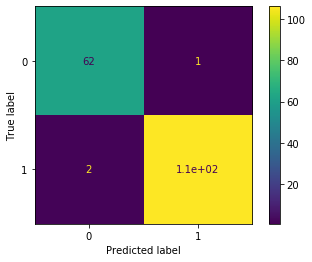

In [4]:
# Split Dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,shuffle=True, random_state=0)

clf = CatBoostClassifier(iterations=80,learning_rate = 0.03, eval_metric="Accuracy", devices='0:1', max_depth=8 ,l2_leaf_reg=0.8,rsm=0.4)
clf.fit(xtrain,ytrain,eval_set = (xtest, ytest),verbose = True)

# bestTest = 0.9824561404
# bestIteration = 39


# Plotting Confusion Matrix
plot_confusion_matrix(clf, xtest, ytest) 
plt.show()

Model 2
- Training Dataset = 80% of the numercical dataset
- Test Dataset = 20% of the numercical dataset

* Accuracy: 99.12%
* Model can be shrinked to 97 iteration only.

0:	learn: 0.9472527	test: 0.9473684	best: 0.9473684 (0)	total: 2.81ms	remaining: 307ms
1:	learn: 0.9472527	test: 0.9210526	best: 0.9473684 (0)	total: 5.33ms	remaining: 288ms
2:	learn: 0.9516484	test: 0.9298246	best: 0.9473684 (0)	total: 8.96ms	remaining: 319ms
3:	learn: 0.9626374	test: 0.9385965	best: 0.9473684 (0)	total: 12.2ms	remaining: 323ms
4:	learn: 0.9692308	test: 0.9298246	best: 0.9473684 (0)	total: 15.5ms	remaining: 327ms
5:	learn: 0.9780220	test: 0.9385965	best: 0.9473684 (0)	total: 18.2ms	remaining: 315ms
6:	learn: 0.9802198	test: 0.9473684	best: 0.9473684 (0)	total: 21.3ms	remaining: 314ms
7:	learn: 0.9780220	test: 0.9561404	best: 0.9561404 (7)	total: 24.4ms	remaining: 311ms
8:	learn: 0.9780220	test: 0.9561404	best: 0.9561404 (7)	total: 27.8ms	remaining: 312ms
9:	learn: 0.9802198	test: 0.9473684	best: 0.9561404 (7)	total: 30.8ms	remaining: 308ms
10:	learn: 0.9824176	test: 0.9385965	best: 0.9561404 (7)	total: 34.3ms	remaining: 309ms
11:	learn: 0.9802198	test: 0.9385965	best:

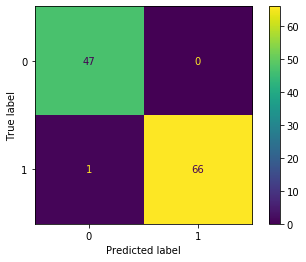

In [5]:
# Split Dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,shuffle=True, random_state=0)

clf = CatBoostClassifier(iterations=110,learning_rate = 0.07, eval_metric="Accuracy", devices='0:1', max_depth=5 ,l2_leaf_reg=0.8,rsm=0.4)
clf.fit(xtrain,ytrain,eval_set = (xtest, ytest),verbose = True)

# bestTest = 0.9912280702
# bestIteration = 96


# Plotting Confusion Matrix
plot_confusion_matrix(clf, xtest, ytest) 
plt.show()